#                   A FLU-SHOT MACHINE LEARNING PROJECT

###   1:BUSINESS UNDERSTANDING

**1.1: OVERVIEW**

Vaccines play a very crucial role in disease prevention,they work by providing immunity to individuals as well communities to prevent certain communicable diseases like COVID-19,swine flu,seasonal flu and Tuberculosis.The first vaccine was developed in 1796,by a English physician Edward Jenner and was used to vaccinate the first human aganist smallpox.Today's vaccines have evolved and become more complex,robust and more efficient these is due to the continous growth of technology and research in the health industry.The H1N1 VACCINE was developed in 2009 and approved for use in 2010 these  is after the swineflue pandemic  broke out in 2009 killing more than two million people worldwide while the seasonal vaccine also known as the flu-shot is commonly used to prevent flu (common cold) during the flu season.

The central disease center(CDC) want to understand how different  individual personal characterstics influence the uptake of the H1N1 ans seasonal vaccine as well as the vaccine patterns which would  provide guidance for future public health efforts.

**1.2:CHALLENGES**

Lack of adequate data driven decisions in provision of H1N1 and seasonal vaccines to the population

**1.3:PROPOSED SOLUTION**

A machine learning model which will predict the uptake of the H1N1 and seasonal vaccines based on there own personal characteristics with "Area under the ROC Curve of 80%

**1.4:BRIEF CCONCLUSION**

Vaccines are crucial for disease prevention, protecting individuals and communities against diseases like COVID-19 and tuberculosis. The CDC is exploring how personal traits affect vaccine uptake, proposing a machine learning model with 80% ROC curve accuracy to predict H1N1 and seasonal flu vaccine uptake based on individual characteristics.

**1.5:PROBLEM STATEMENT**
Vaccines are critical for preventing communicable diseases such as COVID-19, swine flu, seasonal influenza, and tuberculosis. However, making data-driven decisions about vaccine distribution and delivery remains difficult. The CDC seeks to understand how individual features influence uptake of the vaccines so as to provide guidance for future public health efforts

**1.6:OBECTIVES**
**1.6.1:Main objective**

To predict how likely people are to get the H1N1 and seasonal flu vaccines.

**1.6.2:Specific Objectives**

To determine the distribution of the uptake of the H1N1 and seasonal vaccines
To determine the correlation between the uptake of both vaccines
To determine which characteristics are likely to influence one to taking a particular vaccine

### 2:DATA UNDERSTANDING

**2.1: DATA SOURCE**

Data was downloaded from https://www.drivendata.org/competitions/66/flu-shot-learning/data/ which was a phone survey done in 2009 courtesy of the United states National Center for Health Statistics

**2.2:DATA DESCRIPTION**

There are two datasets 
**Features** These contains responses indivuals gave during the phone survey(Contains our predictor variables)
**Labels** These contain reponses whether the had taken either the H1N1 or seasonal vaccine(it contain our two target variables H1N1 and seasonal vaccine  classified as [0,1])

Lets load them


In [1]:
#importing  necessary modules

# Data Manipulation
import pandas as pd 
import numpy as np 

# Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Modelling 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [2]:
#loading the data sets
feature_df = pd.read_csv(r'C:\Users\user\Documents\new\Flu-Shot-Learning-project\training_set_features.csv')
label_df = pd.read_csv(r'C:\Users\user\Documents\new\Flu-Shot-Learning-project\training_set_labels.csv')
print(feature_df)
print(label_df)

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance

In [3]:
#lets merge the two data sets because they share a similar column respondent id using a left joint
vaccine_df = feature_df.merge(label_df, how='left', on='respondent_id')

In [4]:
#lets create a DataUnderstanding class and intialize it which will help us understand our merged dataset 

# Define the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, data):
        self.data = data

    def data_shape(self):
        print(f"Shape: {self.data.shape}")

    def summary_info(self):
        print("Dataframe Info:")
        self.data.info()
    
    def summary_statistics(self):
        print(f"Descriptive Statistics:\n{self.data.describe()}")

    def columns_summary(self):
        print(f"Columns:\n{self.data.columns.tolist()}")

    def data_types(self):
        print(f"Data Types for each column:\n{self.data.dtypes}")

    def first_rows(self, n=10):
        print(f"The first {n} rows:\n{self.data.head(n)}")

    def last_rows(self, n=10):
        print(f"The last {n} rows:\n{self.data.tail(n)}")

    def columns_value_counts(self):
        for column in self.data.columns:
            print(f"Value counts for column '{column}':")
            print(self.data[column].value_counts())
            print("\n")


# Initialize the DataUnderstanding class with the merged DataFrame
data_summary = DataUnderstanding(vaccine_df)

# Calling all the methods to see the outputs
data_summary.data_shape()
data_summary.summary_info()
data_summary.summary_statistics()
data_summary.columns_summary()
data_summary.data_types()
data_summary.first_rows()
data_summary.last_rows()
data_summary.columns_value_counts()


Shape: (26707, 38)
Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-

**2.3:COLUMN DISTRIBUTION**

We have 38 rows lets try to understand what they mean courtesy of(**https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/**)

h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

behavioral_antiviral_meds - Has taken antiviral medications. (binary)

behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

behavioral_face_mask - Has bought a face mask. (binary)

behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver 
condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

health_worker - Is a healthcare worker. (binary)

health_insurance - Has health insurance. (binary)

opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

age_group - Age group of respondent.

education - Self-reported education level.

race - Race of respondent.

sex - Sex of respondent.

income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

marital_status - Marital status of respondent.

rent_or_own - Housing situation of respondent.

employment_status - Employment status of respondent.

hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and 

Human Services. Values are represented as short random character strings.

census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

household_adults - Number of other adults in household, top-coded to 3.

household_children - Number of children in household, top-coded to 3.

employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

These dataset is relevant to our project

### DATA CLEANING

At these stage we will clean our data using the following steps

. **Completeness** (we will check for missing values , how they affect our data set and how we will handle them)

. **Consistency** (we will check for duplicate values and how to handle them)

. **Uniformity** (we will check for data types and changing  them)

. **Validity** (we will handlle irrelevant columns and check for outliers )

 #### Completeness

In [5]:
#Lets create a class to help us clean our data which will inherit from our DataUnderstanding class
class DataCleaning(DataUnderstanding):
    def missing_values_summary(self):
        missing_values = self.data.isnull().sum()
        missing_values_percentage = (self.data.isnull().mean() * 100)

        missing_summary = pd.DataFrame({
            'Missing Values': missing_values,
            'Percentage': missing_values_percentage
        })

        print("Missing values summary per column:")
        print(missing_summary)
        
null_summary = DataCleaning(vaccine_df)
null_summary.missing_values_summary()

Missing values summary per column:
                             Missing Values  Percentage
respondent_id                             0    0.000000
h1n1_concern                             92    0.344479
h1n1_knowledge                          116    0.434343
behavioral_antiviral_meds                71    0.265848
behavioral_avoidance                    208    0.778822
behavioral_face_mask                     19    0.071142
behavioral_wash_hands                    42    0.157262
behavioral_large_gatherings              87    0.325757
behavioral_outside_home                  82    0.307036
behavioral_touch_face                   128    0.479275
doctor_recc_h1n1                       2160    8.087767
doctor_recc_seasonal                   2160    8.087767
chronic_med_condition                   971    3.635751
child_under_6_months                    820    3.070356
health_worker                           804    3.010447
health_insurance                      12274   45.957989
opinion_h1n1_

There are columns with missing values with some columns such as  **health_insurance,employment_industry and employment_occupation** having more than 40% missing values.Let's investigate further as we find means of handling them these is because we are working with a very sensitive dataset in the health industry

First, we have to drop the columns with the largest percentage of missing values because they will greatly affect our model performances,reliability as well as quality of our data if we drop the null values or try to fill them we will drop the three columns with more than 40% of missing values because these represents almost half of the values

In [6]:
#dropping columns with more than 40% null values 
vaccine_df.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace = True)

In [7]:
#let look at the unique elements in columns with null values 

def unique_elements(data):
    for column in data.columns:
        if data[column].isnull().any():
            print(f"Column: {column}")
            unique_elements = data[column].value_counts(dropna=False)
            for element, count in unique_elements.items():
                print(f"{element}: {count}")

In [8]:
unique_elements(vaccine_df)

Column: h1n1_concern
2.0: 10575
1.0: 8153
3.0: 4591
0.0: 3296
nan: 92
Column: h1n1_knowledge
1.0: 14598
2.0: 9487
0.0: 2506
nan: 116
Column: behavioral_antiviral_meds
0.0: 25335
1.0: 1301
nan: 71
Column: behavioral_avoidance
1.0: 19228
0.0: 7271
nan: 208
Column: behavioral_face_mask
0.0: 24847
1.0: 1841
nan: 19
Column: behavioral_wash_hands
1.0: 22015
0.0: 4650
nan: 42
Column: behavioral_large_gatherings
0.0: 17073
1.0: 9547
nan: 87
Column: behavioral_outside_home
0.0: 17644
1.0: 8981
nan: 82
Column: behavioral_touch_face
1.0: 18001
0.0: 8578
nan: 128
Column: doctor_recc_h1n1
0.0: 19139
1.0: 5408
nan: 2160
Column: doctor_recc_seasonal
0.0: 16453
1.0: 8094
nan: 2160
Column: chronic_med_condition
0.0: 18446
1.0: 7290
nan: 971
Column: child_under_6_months
0.0: 23749
1.0: 2138
nan: 820
Column: health_worker
0.0: 23004
1.0: 2899
nan: 804
Column: opinion_h1n1_vacc_effective
4.0: 11683
5.0: 7166
3.0: 4723
2.0: 1858
1.0: 886
nan: 391
Column: opinion_h1n1_risk
2.0: 9919
1.0: 8139
4.0: 5394
5.0:

Most of the null values are due to reluctance of respondents to share  information which can be crucial for modeling,therefore we will fill the null values with the mode for categorical variables and median for all numerical variables .The reason behind these is that the mode and median represent majority of the responses to each survey questions and dropping the null vallues could signifiantly affect our quality of our data for modelling

In [9]:
#filling all the remaining null alues with our mode for both numerical and categorical variables using a for loop
for i in vaccine_df.columns:
    if vaccine_df[i].isnull().sum() and vaccine_df[i].dtypes != 'object':
        vaccine_df[i].loc[(vaccine_df[i].isnull())] = vaccine_df[i].median()
for i in vaccine_df.columns:
    if vaccine_df[i].isnull().sum() and vaccine_df[i].dtypes == 'object':
        vaccine_df[i].loc[(vaccine_df[i].isnull())] = vaccine_df[i].mode().max()

C:\Users\user\AppData\Local\Temp\ipykernel_8796\269860166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_df[i].loc[(vaccine_df[i].isnull())] = vaccine_df[i].median()
C:\Users\user\AppData\Local\Temp\ipykernel_8796\269860166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_df[i].loc[(vaccine_df[i].isnull())] = vaccine_df[i].median()
C:\Users\user\AppData\Local\Temp\ipykernel_8796\269860166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [10]:
#checking to see our changes
vaccine_df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

Our dataset now does not have any null values lets proceed to the next process 

#### Consistency

In [11]:
#lets check for duplicate values
vaccine_df.duplicated().sum()

0

We don't have any duplicate values

#### Uniformity

We will change the float columns dtypes into interger this is because we need consistency in our data types Ensuring that all numerical features are consistently typed hence simplifying the data processing for modelling

In [12]:
# Converting all float columns to integers using a for loop
for i in vaccine_df.columns:
    if vaccine_df[i].dtype == 'float64':
        vaccine_df[i] = vaccine_df[i].astype('int64')
        
#lets confirm our changes
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                26707 non-null  int64 
 1   h1n1_concern                 26707 non-null  int64 
 2   h1n1_knowledge               26707 non-null  int64 
 3   behavioral_antiviral_meds    26707 non-null  int64 
 4   behavioral_avoidance         26707 non-null  int64 
 5   behavioral_face_mask         26707 non-null  int64 
 6   behavioral_wash_hands        26707 non-null  int64 
 7   behavioral_large_gatherings  26707 non-null  int64 
 8   behavioral_outside_home      26707 non-null  int64 
 9   behavioral_touch_face        26707 non-null  int64 
 10  doctor_recc_h1n1             26707 non-null  int64 
 11  doctor_recc_seasonal         26707 non-null  int64 
 12  chronic_med_condition        26707 non-null  int64 
 13  child_under_6_months         26

#### Validity

In [13]:
#checking for outliers using intequatrile method for each numeric column
Q1 = vaccine_df.quantile(0.25, numeric_only=True)
Q3 = vaccine_df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

respondent_id                  13353.0
h1n1_concern                       1.0
h1n1_knowledge                     1.0
behavioral_antiviral_meds          0.0
behavioral_avoidance               1.0
behavioral_face_mask               0.0
behavioral_wash_hands              0.0
behavioral_large_gatherings        1.0
behavioral_outside_home            1.0
behavioral_touch_face              1.0
doctor_recc_h1n1                   0.0
doctor_recc_seasonal               1.0
chronic_med_condition              1.0
child_under_6_months               0.0
health_worker                      0.0
opinion_h1n1_vacc_effective        2.0
opinion_h1n1_risk                  3.0
opinion_h1n1_sick_from_vacc        3.0
opinion_seas_vacc_effective        1.0
opinion_seas_risk                  2.0
opinion_seas_sick_from_vacc        1.0
household_adults                   1.0
household_children                 1.0
h1n1_vaccine                       0.0
seasonal_vaccine                   1.0
dtype: float64


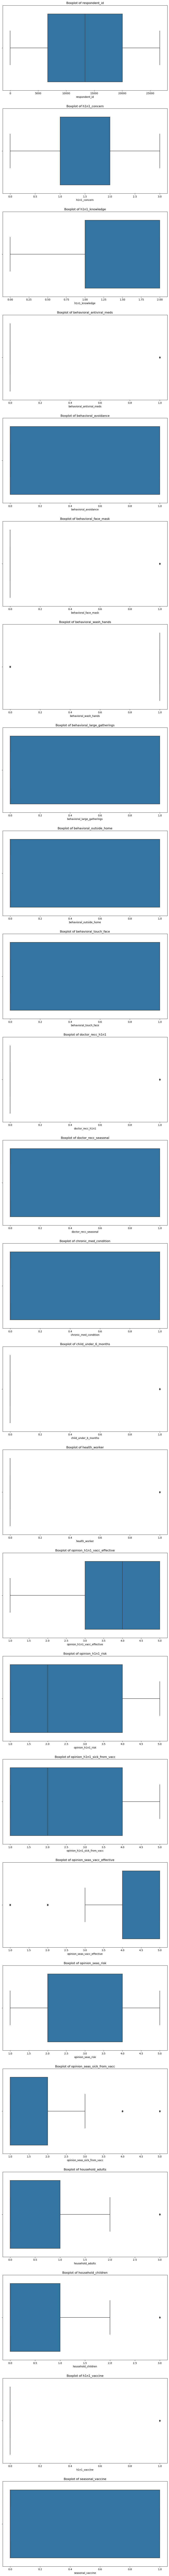

In [14]:
# Plotting box plots to visualize our outlier
numeric_columns = vaccine_df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 6 * len(numeric_columns)))
for i, column in enumerate(numeric_columns):
    ax = axes[i] if len(numeric_columns) > 1 else axes  
    sns.boxplot(x=vaccine_df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
    

plt.tight_layout(pad=3.0) 
plt.subplots_adjust(top=0.95)

After visualizing we did find any outliers hence our data has no outliers  these is because our data includes response which were categorized into various class

In [15]:
#Lets store our cleaned data in a new ariable clean_vac_df
clean_vac_df = vaccine_df

We are now our comfortable our data is clean lets begin  our  data analysis to obtain more insights from our data